In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
path_to_data = 'C:/Users/amani/Documents/python' 
os.chdir(path_to_data)
print(f"Nouveau répertoire de travail : {os.getcwd()}")

Nouveau répertoire de travail : C:\Users\amani\Documents\python


In [18]:
print(os.listdir())

['Python Analysis']


In [21]:
file_path_final = 'Python Analysis/listings.csv' 
df = pd.read_csv(file_path_final)
print("Le fichier a été chargé avec succès ! Analyse prête à démarrer.")
df.head()

Le fichier a été chargé avec succès ! Analyse prête à démarrer.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,134.0,31,499,2025-09-01,2.69,2,312,31,"Quebec - Registration number<br />267153, expi..."
1,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,253.0,2,168,2025-09-02,1.02,2,332,20,"Quebec - Registration number<br />267153, expi..."
2,38118,Beautiful room with a balcony in front of a parc,163569,M.,NaN,Ville-Marie,45.52699,-73.55840,Private room,47.0,31,17,2024-08-31,0.10,3,322,0,NaN
3,50479,L'Arcade Douce,231694,Noemie,NaN,Rosemont-La Petite-Patrie,45.54157,-73.60737,Entire home/apt,156.0,3,349,2025-09-12,1.92,2,29,56,"Quebec - Registration number<br />271530, expi..."
4,66247,Modern Loft Next To Basilica Notre Dame In Old...,318040,Mohamed,NaN,Ville-Marie,45.50584,-73.55602,Entire home/apt,146.0,31,588,2025-09-03,3.28,4,38,84,"Quebec - Registration number<br />314544, expi..."


In [22]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9550 non-null   int64  
 1   name                            9550 non-null   object 
 2   host_id                         9550 non-null   int64  
 3   host_name                       9549 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9550 non-null   object 
 6   latitude                        9550 non-null   float64
 7   longitude                       9550 non-null   float64
 8   room_type                       9550 non-null   object 
 9   price                           8483 non-null   float64
 10  minimum_nights                  9550 non-null   int64  
 11  number_of_reviews               9550 non-null   int64  
 12  last_review                     76

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.550000e+03,9.550000e+03,0.0,9550.000000,9550.000000,8483.000000,9550.000000,9550.000000,7635.000000,9550.000000,9550.000000,9550.000000
mean,7.898922e+17,2.508675e+08,NaN,45.511957,-73.588266,180.857715,26.074869,42.208691,1.735713,16.421152,202.915288,11.937382
std,5.618820e+17,2.247413e+08,NaN,0.033020,0.048211,495.875569,35.488806,78.621314,2.152446,28.977474,118.555774,21.591958
min,2.905900e+04,2.319000e+03,NaN,45.405470,-73.947310,12.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,5.011358e+07,3.414866e+07,NaN,45.494880,-73.600045,81.000000,2.000000,1.000000,0.260000,1.000000,99.000000,0.000000
50%,9.433531e+17,1.955014e+08,NaN,45.511380,-73.575750,125.000000,31.000000,10.000000,0.970000,5.000000,219.000000,2.000000
75%,1.281169e+18,4.646616e+08,NaN,45.528120,-73.562564,192.000000,31.000000,47.000000,2.705000,16.000000,315.000000,17.000000
max,1.512003e+18,7.181658e+08,NaN,45.699950,-73.481630,26724.000000,730.000000,986.000000,50.000000,141.000000,365.000000,427.000000


In [23]:
# 1. Enlever les caractères '$' et ','
df['price'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True)

# 2. Convertir en nombre flottant
# Note: Si la conversion échoue (par exemple, à cause de valeurs vides), 'coerce' les mettra à NaN.
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 3. Supprimer les lignes où le prix est manquant (NaN) ou trop bas/haut pour l'analyse
# Nous gardons seulement les prix > 0
df = df[df['price'] > 0]

# Vérifier la nouvelle moyenne pour confirmer la conversion
print("\nPrix moyen après nettoyage :")
print(df['price'].mean())


Prix moyen après nettoyage :
180.85771543086173


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8483 entries, 0 to 9549
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8483 non-null   int64  
 1   name                            8483 non-null   object 
 2   host_id                         8483 non-null   int64  
 3   host_name                       8482 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8483 non-null   object 
 6   latitude                        8483 non-null   float64
 7   longitude                       8483 non-null   float64
 8   room_type                       8483 non-null   object 
 9   price                           8483 non-null   float64
 10  minimum_nights                  8483 non-null   int64  
 11  number_of_reviews               8483 non-null   int64  
 12  last_review                     6791 no

In [25]:
# Colonne totalement vide.
df = df.drop('neighbourhood_group', axis=1)

# Les colonnes 'id' et 'host_id' sont des identifiants uniques et ne servent pas à l'analyse de prix/tendances.
# 'name' et 'host_name' sont des chaînes de texte complexes.
df = df.drop(['id', 'host_id', 'name', 'host_name'], axis=1)

# Afficher les nouvelles colonnes
print("Colonnes restantes :")
print(df.columns)

Colonnes restantes :
Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [26]:
# Remplacer les valeurs manquantes (NaN) dans reviews_per_month par 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Vérifier que le nombre de valeurs non-nulles a augmenté pour cette colonne
print("\nStatut des reviews_per_month après nettoyage :")
print(df['reviews_per_month'].isnull().sum()) # Devrait afficher 0


Statut des reviews_per_month après nettoyage :
0


In [27]:
# Filtrer pour les prix réalistes :
# Par exemple, supprimer les annonces de moins de 10 $ et de plus de 500 $ (ou 750 $ selon votre ville)
price_threshold = 500
df = df[(df['price'] >= 10) & (df['price'] <= price_threshold)]

print(f"\nTaille du DataFrame après suppression des outliers de prix (<10 ou >{price_threshold} $): {len(df)} lignes")


Taille du DataFrame après suppression des outliers de prix (<10 ou >500 $): 8222 lignes


Prix Moyen par Type de Chambre :
room_type
Hotel room         252.724138
Entire home/apt    157.471085
Private room        76.544180
Shared room         61.608696
Name: price, dtype: float64

---


C:\Users\amani\AppData\Local\Temp\ipykernel_35732\2127350564.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_room.index, y=avg_price_by_room.values, palette='viridis')


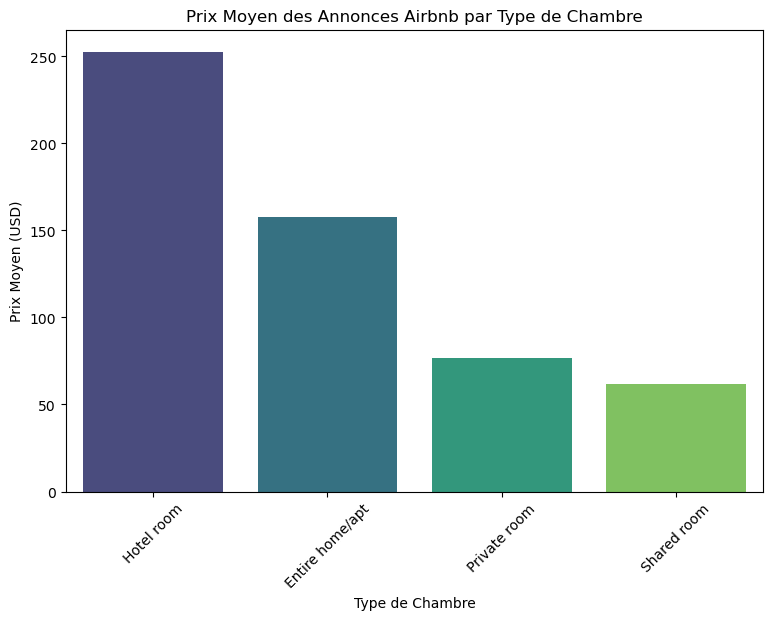

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer le prix moyen pour chaque type de chambre
avg_price_by_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

print("Prix Moyen par Type de Chambre :")
print(avg_price_by_room)
print("\n---")

# Créer un graphique à barres pour la visualisation
plt.figure(figsize=(9, 6))
# Le type de graphique 'barplot' est idéal pour comparer les moyennes de différentes catégories.
sns.barplot(x=avg_price_by_room.index, y=avg_price_by_room.values, palette='viridis')
plt.title('Prix Moyen des Annonces Airbnb par Type de Chambre')
plt.ylabel('Prix Moyen (USD)')
plt.xlabel('Type de Chambre')
plt.xticks(rotation=45) # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


Top 10 des Quartiers les Plus Chers :
neighbourhood
L'Île-Bizard-Sainte-Geneviève               198.000000
Baie-d'Urfé                                 179.000000
Outremont                                   178.482759
Le Plateau-Mont-Royal                       171.871256
Côte-Saint-Luc                              164.312500
Ville-Marie                                 162.749303
Westmount                                   162.529412
Kirkland                                    151.272727
Dorval                                      147.047619
Rivière-des-Prairies-Pointe-aux-Trembles    141.100000
Name: price, dtype: float64


C:\Users\amani\AppData\Local\Temp\ipykernel_35732\2584837655.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='plasma')


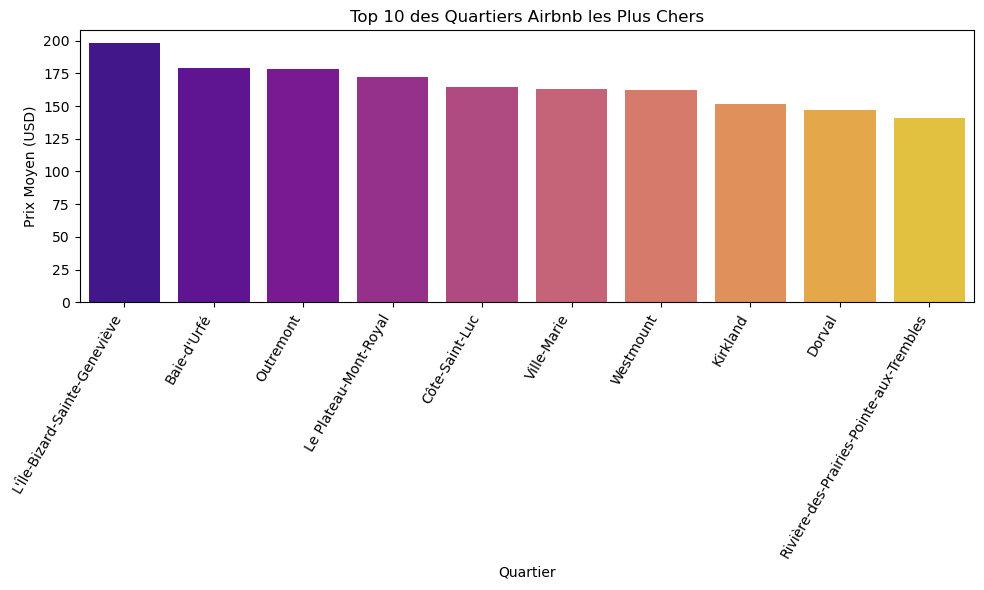

In [29]:
# Regrouper les données par 'neighbourhood' et calculer le prix moyen
top_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

print("\nTop 10 des Quartiers les Plus Chers :")
print(top_neighborhoods)

# Créer une visualisation pour ce classement
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='plasma')
plt.title('Top 10 des Quartiers Airbnb les Plus Chers')
plt.ylabel('Prix Moyen (USD)')
plt.xlabel('Quartier')
plt.xticks(rotation=60, ha='right') # Rotation pour la lisibilité
plt.tight_layout()
plt.show()


Top 10 des Quartiers Airbnb les Plus Chers (Prix Moyen) :
neighbourhood
L'Île-Bizard-Sainte-Geneviève               198.000000
Baie-d'Urfé                                 179.000000
Outremont                                   178.482759
Le Plateau-Mont-Royal                       171.871256
Côte-Saint-Luc                              164.312500
Ville-Marie                                 162.749303
Westmount                                   162.529412
Kirkland                                    151.272727
Dorval                                      147.047619
Rivière-des-Prairies-Pointe-aux-Trembles    141.100000
Name: price, dtype: float64


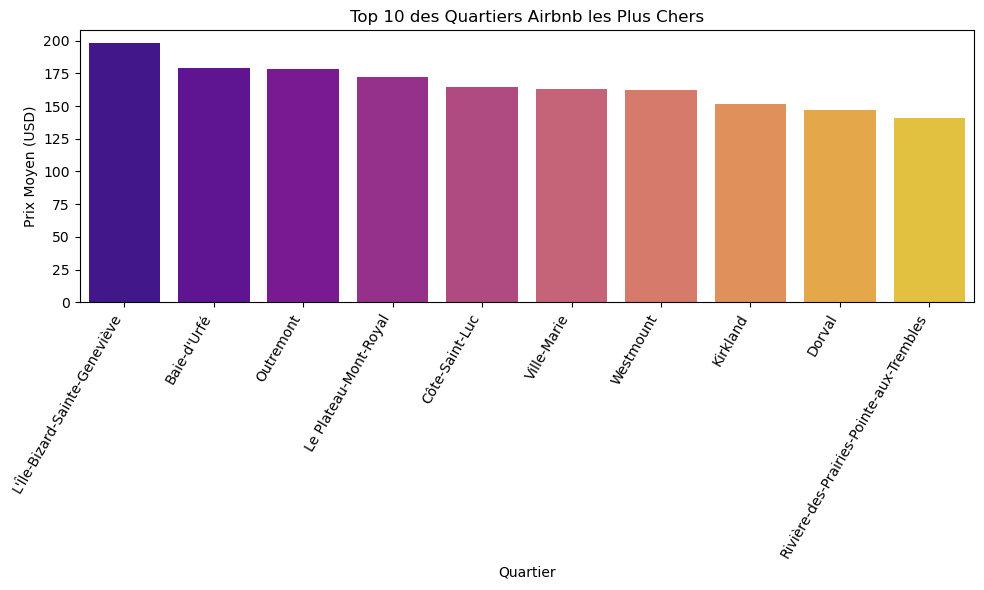

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regrouper les données par 'neighbourhood' et calculer le prix moyen
top_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

print("\nTop 10 des Quartiers Airbnb les Plus Chers (Prix Moyen) :")
print(top_neighborhoods)

# Créer une visualisation pour ce classement
plt.figure(figsize=(10, 6))
# J'ai ajusté le code pour éliminer l'avertissement (en ajoutant hue et legend=False)
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='plasma', hue=top_neighborhoods.index, legend=False) 
plt.title('Top 10 des Quartiers Airbnb les Plus Chers')
plt.ylabel('Prix Moyen (USD)')
plt.xlabel('Quartier')
plt.xticks(rotation=60, ha='right') # Rotation pour la lisibilité
plt.tight_layout()
plt.show()

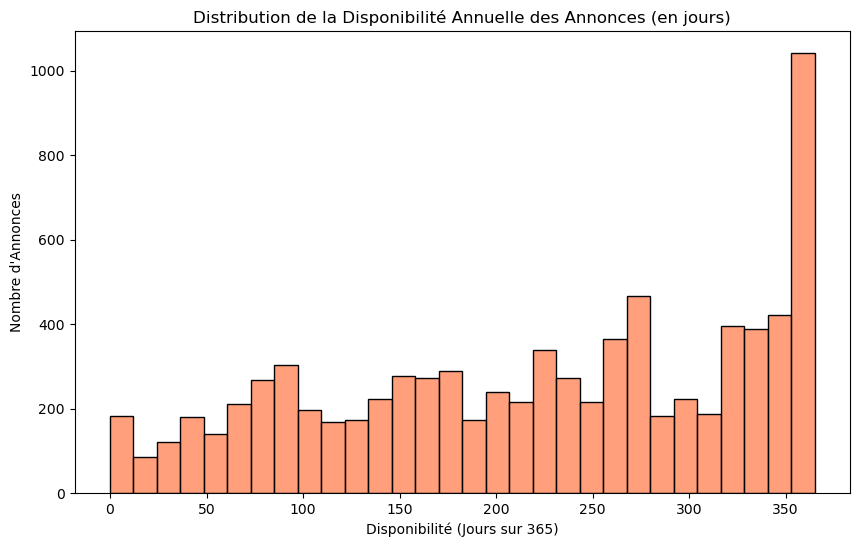

In [31]:
# Distribution de la disponibilité
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=False, color='coral')
plt.title('Distribution de la Disponibilité Annuelle des Annonces (en jours)')
plt.xlabel('Disponibilité (Jours sur 365)')
plt.ylabel('Nombre d\'Annonces')
plt.show()

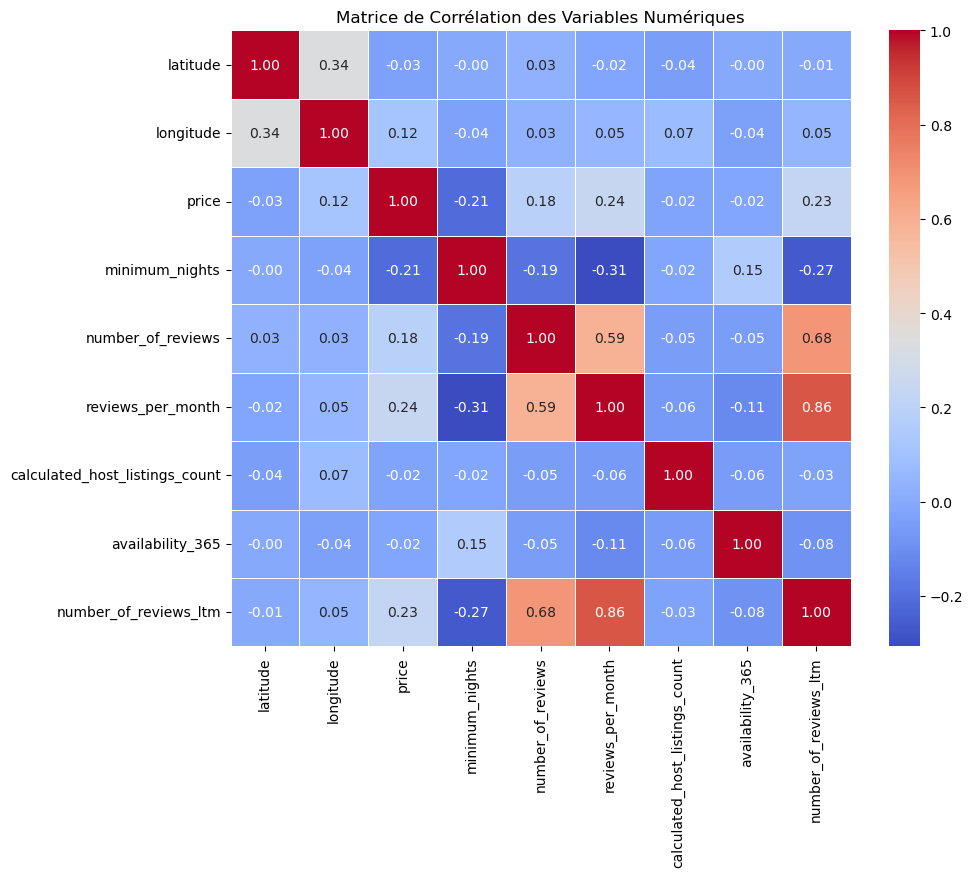

In [32]:
# Sélectionner uniquement les colonnes numériques pour la corrélation
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
# Créer une heatmap (carte de chaleur) pour visualiser les corrélations
sns.heatmap(correlation_matrix, 
            annot=True, # Afficher les valeurs numériques
            cmap='coolwarm', # Définir le schéma de couleurs
            fmt=".2f", # Formater les nombres à 2 décimales
            linewidths=.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()